# Heart Disease Prediction:
## by Cemile Senem Arabaci

### This analysis is to predict if a patient has heart disease or not by using the given variables for the patient.  

In [1]:
!pip freeze > requirements.txt


## Importing the libraries we need 

In [2]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
sns.set()
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('mode.chained_assignment', None)

#!pip install xgboost
#!pip install tensorflow

from scipy.stats import skew
from sklearn import model_selection
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, precision_score, recall_score, plot_roc_curve 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

from scipy import stats
from scipy.stats import zscore
from scipy.stats.mstats import winsorize 

from sklearn.metrics import classification_report
import sklearn.metrics as metrics
from sklearn.preprocessing import RobustScaler

import plotly.graph_objects as go
import tensorflow as tf

import plotly.express as px

In [5]:
df = pd.read_csv('Dataset for DS Challenge.csv')

## Understanding variables given in the dataset

Heart attack (myocardial infarction) happens when one or more areas of the heart muscle don't get enough oxygen. This happens when blood flow to the heart muscle is blocked.


According to Mayo Clinic, men age 45 and older and women age 55 and older are more likely to have a heart attack than are younger men and women.

High blood pressure is a common factor for stroke and major risk factor for heart attacks according to Heart and Stroke Foundation of Canada. We can say resting blood pressure should also tell us similar trends compared to heart attacks.

According to BMJ global health men are more likely to develop heart disease than women. 

Among chest pains, there are typical angina means patient shows 3 types of heart attack symptoms. Atypical angina shows 2 and non-anginal pain shows 1 symptom among 3 types of heart attack symptoms. Asymptomatic has nearly no symptoms or not well recognizable. Therefore, we can expect our data to show patients with heart disease at typical angina. 

Bad cholesterol (LDL) correlates with heart disease since it is one of the reasons for artery-cloggying plague according to WebMD. 

Resting electrocardiographic results can be assessed as Left
ventricular hypertrophy can have heart disease and it is less likely for ST-T wave normality according to Huwez FU, Pringle SD, Macfarlane PW. Variable patterns of ST-T abnormalities in patients with left ventricular hypertrophy and normal coronary arteries. Br Heart J. 1992 Apr;67(4):304-7. doi: 10.1136/hrt.67.4.304. PMID: 1389704; PMCID: PMC1024837.

Fasting blood sugar level 100-125 mg/dl shows heart disease risk increase and here we categorize it if it is higher than 120 or not. 

The maximum heart rate increases during heart attack according to a medically review article by healthline media. 

According to Heart and Stroke Foundation of Canada, Angina will sometimes cause dizziness, paleness, weakness. Heart attack symptoms often include nausea or throwing up, weakness, tiredness or sweating.









### Approach

### Data Summary

Our dataset is small in size therefore we will use only Machine Learning models to test and train our dataset and no Neural Networks (deeplearning algorithms). 

In [26]:
from tabulate import tabulate
 
# assign data
mydata = [["Age","Age of the patient"],
    ["Sex" , "1 is male , 0 is female"],
    ["Output", "1 is heart attack, 0 is normal"],
    ["cp", "Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 =Non-anginal Pain, 3 =Asymptomatic "],
      ["trtbps", "Resting blood pressure"],["chol","Cholestoral in mg/dl fetched via BMI sensor"],["restecg","Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy"],["fbs","(fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False"],["thalachh","Maximum heart rate achieved"],["oldpeak","previous peak"],["slp", "slope ranges from 1-6 (found below)"],["caa", "number of major vessels"],["thall", "Thalium Stress Test result ~ (0,3)"],["exng", "Exercise induced angina ~ 1 = Yes, 0 = No"],[ "o2Saturation" ,"Blood oxygen saturation (%)"]
]
 
# create header
head = ["Attribute", "Description"]
 
# display table
print(tabulate(mydata, headers=head))

Attribute     Description
------------  ------------------------------------------------------------------------------------------------------------
Age           Age of the patient
Sex           1 is male , 0 is female
Output        1 is heart attack, 0 is normal
cp            Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 =Non-anginal Pain, 3 =Asymptomatic
trtbps        Resting blood pressure
chol          Cholestoral in mg/dl fetched via BMI sensor
restecg       Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy
fbs           (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False
thalachh      Maximum heart rate achieved
oldpeak       previous peak
slp           slope ranges from 1-6 (found below)
caa           number of major vessels
thall         Thalium Stress Test result ~ (0,3)
exng          Exercise induced angina ~ 1 = Yes, 0 = No
o2Saturation  Blood oxygen saturation (%)


#### There is none of the feature values on rows after row 303 present

In [7]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,o2Saturation
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0,98.6
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0,98.6
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0,98.6
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0,98.6
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0,98.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.6
3582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.6
3583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.6
3584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.6


#### Preview the info of dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           303 non-null    float64
 1   sex           303 non-null    float64
 2   cp            303 non-null    float64
 3   trtbps        303 non-null    float64
 4   chol          303 non-null    float64
 5   fbs           303 non-null    float64
 6   restecg       303 non-null    float64
 7   thalachh      303 non-null    float64
 8   exng          303 non-null    float64
 9   oldpeak       303 non-null    float64
 10  slp           303 non-null    float64
 11  caa           303 non-null    float64
 12  thall         303 non-null    float64
 13  output        303 non-null    float64
 14  o2Saturation  3586 non-null   float64
dtypes: float64(15)
memory usage: 420.4 KB


In [27]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,o2Saturation
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,3586.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554,98.239375
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835,0.726260
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,96.500000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,97.600000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000,98.600000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000,98.600000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000,99.600000


In [ ]:
3586-303

3283

#### There are 3283 null instances. We observe that only 303 rows have only output variables and no feature variable. Since the feature variables are completely absent, we will drop these cases for further analysis. The dataset comprises 303 examples (patients).

##### Drop the empty rows on the table.

In [28]:
df = df.dropna(axis=0)

In [29]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,o2Saturation
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0,98.6
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0,98.6
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0,98.6
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0,98.6
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0,98.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57.0,0.0,0.0,140.0,241.0,0.0,1.0,123.0,1.0,0.2,1.0,0.0,3.0,0.0,97.5
299,45.0,1.0,3.0,110.0,264.0,0.0,1.0,132.0,0.0,1.2,1.0,0.0,3.0,0.0,97.5
300,68.0,1.0,0.0,144.0,193.0,1.0,1.0,141.0,0.0,3.4,1.0,2.0,3.0,0.0,97.5
301,57.0,1.0,0.0,130.0,131.0,0.0,1.0,115.0,1.0,1.2,1.0,1.0,3.0,0.0,97.5


##### Checking if there is still any missing value.

In [30]:
df.isnull().sum()

age             0
sex             0
cp              0
trtbps          0
chol            0
fbs             0
restecg         0
thalachh        0
exng            0
oldpeak         0
slp             0
caa             0
thall           0
output          0
o2Saturation    0
dtype: int64

### Data Exploration 

####Understanding output variable: From the chart, we observe that this is almost balanced dataset.Therefore, it can be fairly comparable with other features suc as features such as colestrol, resting blood pressure, age, ...

In [31]:
#@title ###Heart Disease Output Value Distribution in a Pie Chart
colors = ['gold', 'mediumturquoise']
labels = ['Normal','Heart Disease Distribution of Values']
values = df['output'].value_counts()/df['output'].shape[0]

fig0 = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig0.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig0.update_layout(
    title_text="Heart Disease",
    title_font_color="black",
    legend_title_font_color="yellow",
    #paper_bgcolor="black",
    #plot_bgcolor='black',
    font_color="black",
)
fig0.show()

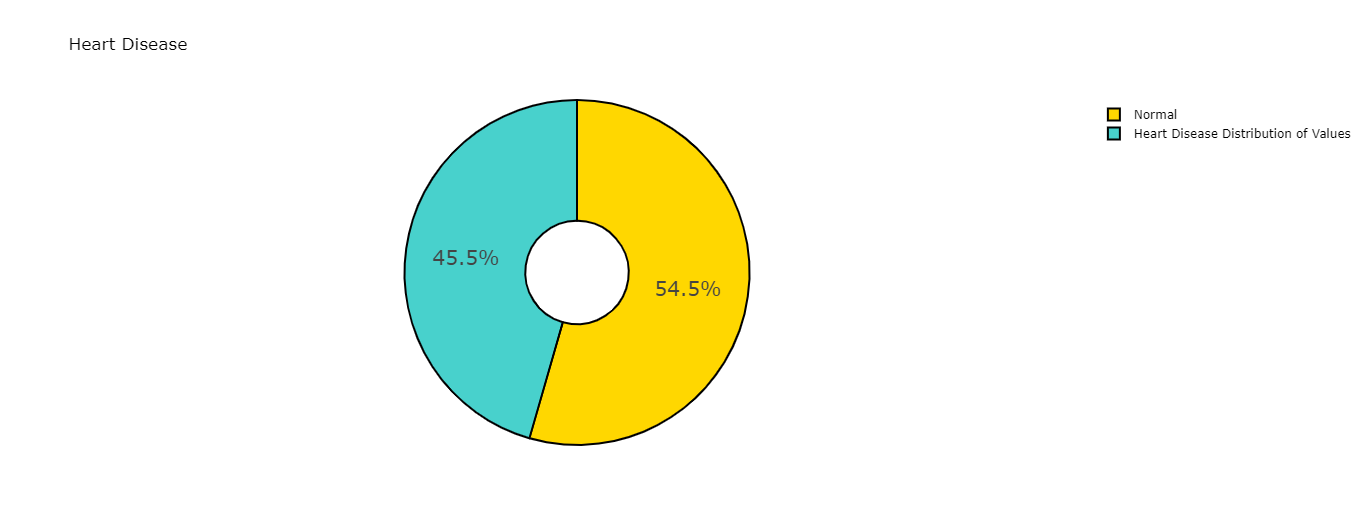


#### Now, let's understand the feature variables: 
#### There are 8 categorical features and 5 continuous features 
#### Let's first analyze the continuous feature variables.



### Normal and Heart Attack Chance distributed on Continuous features

Reminder: Output 0 means normal health and 1 means heart disease. 

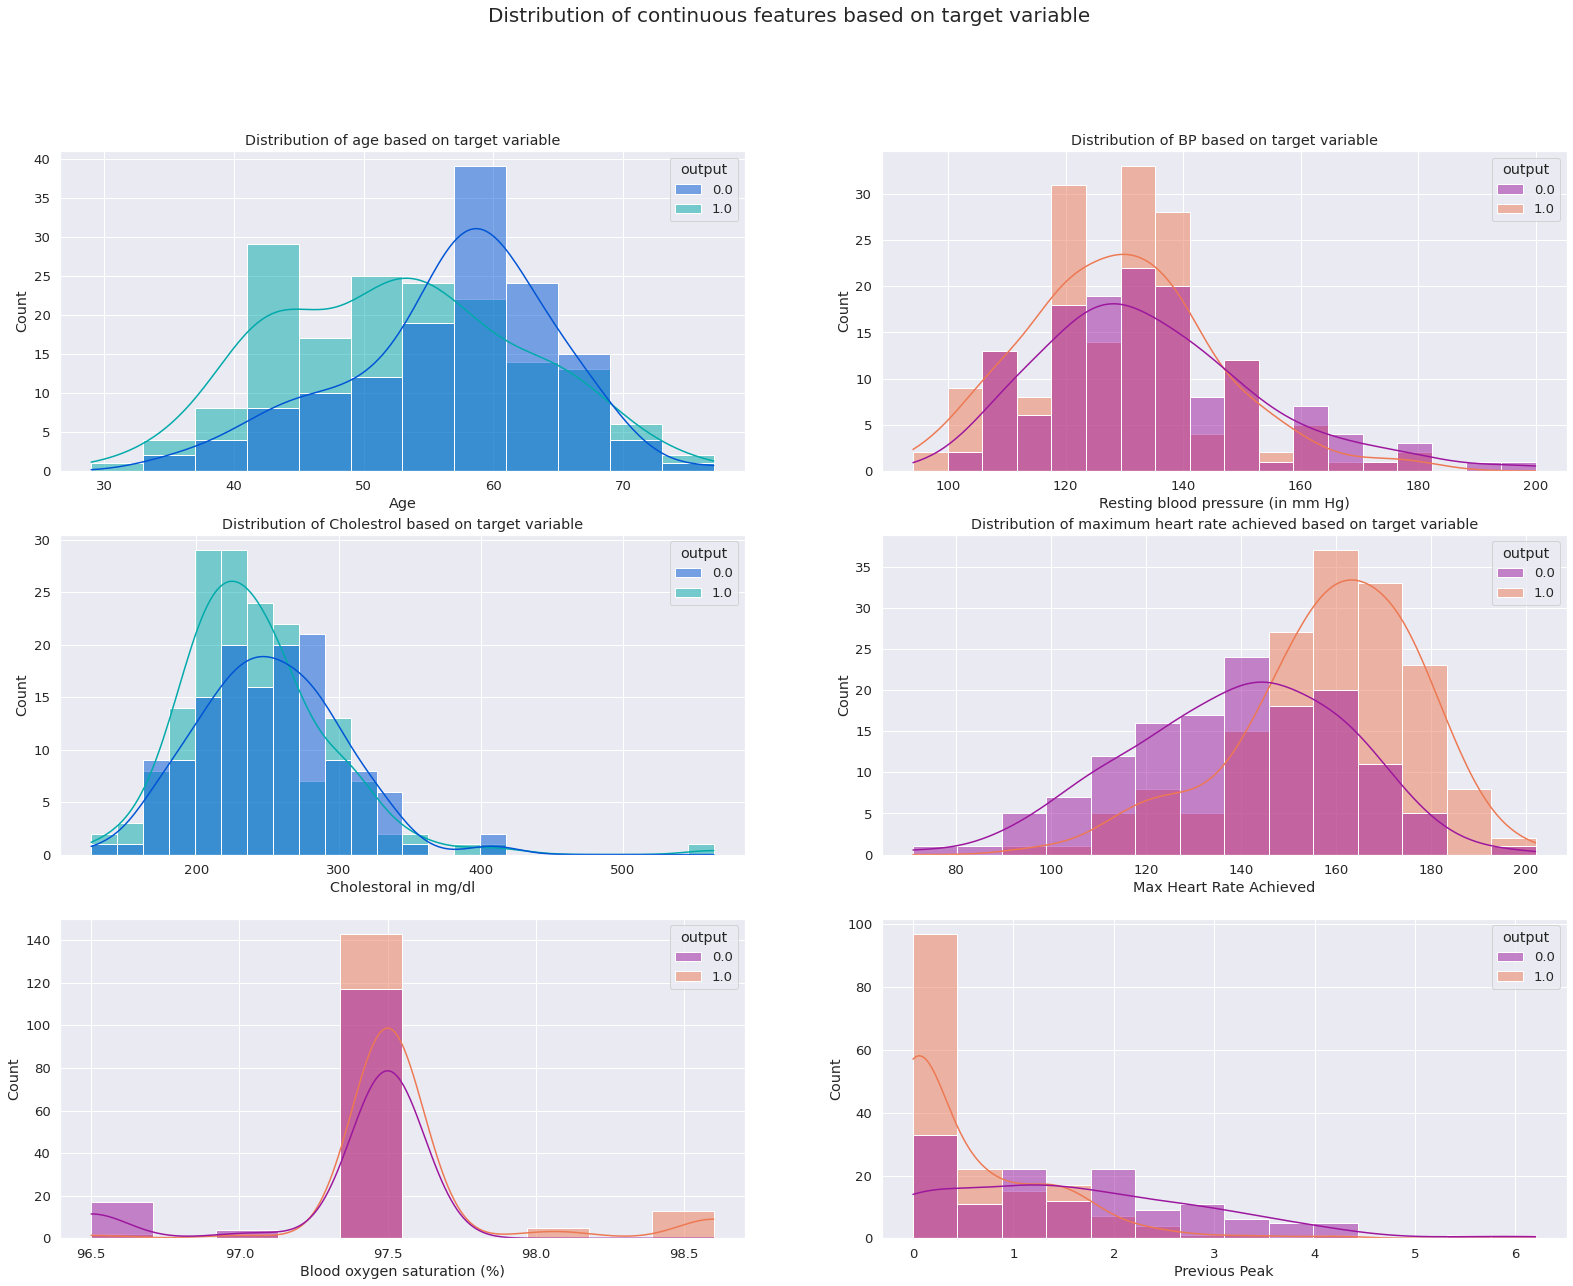

In [32]:
#@title #Normal and Heart Attack Chance distributed on Continuous features
sns.set_context('notebook', font_scale= 1.2)
fig, ax = plt.subplots(3, 2, figsize = (27, 20))

plt.suptitle('Distribution of continuous features based on target variable', fontsize = 20)

ax1 = sns.histplot(x ='age', data= df, hue= 'output', kde= True, ax= ax[0, 0], palette='winter')
ax1.set(xlabel = 'Age', title= 'Distribution of age based on target variable')

ax2 = sns.histplot(x ='trtbps', data= df, hue= 'output', kde= True, ax= ax[0, 1], palette='plasma')
ax2.set(xlabel = 'Resting blood pressure (in mm Hg)', title= 'Distribution of BP based on target variable')

ax3 = sns.histplot(x ='chol', data= df, hue= 'output', kde= True, ax= ax[1, 0], palette='winter')
ax3.set(xlabel = 'Cholestoral in mg/dl', title= 'Distribution of Cholestrol based on target variable')

ax4 = sns.histplot(x ='thalachh', data= df, hue= 'output', kde= True, ax= ax[1, 1], palette='plasma')
ax4.set(xlabel = 'Max Heart Rate Achieved', title= 'Distribution of maximum heart rate achieved based on target variable')

ax5 = sns.histplot(x ='o2Saturation', data= df, hue= 'output', kde= True, ax= ax[2, 0], palette='plasma')
ax5.set(xlabel = 'Blood oxygen saturation (%)')


ax6 = sns.histplot(x ='oldpeak', data= df, hue= 'output', kde= True, ax= ax[2, 1], palette='plasma')
ax6.set(xlabel = 'Previous Peak')

plt.show()

### Previous peak based on target variable (output)


* Age - Target Variable 

There is some interesting data in this chart. Typically, the general belief is that heart attack increases with age.
However, the graph tells us that we are wrong about this.
If you have noticed, the number of people at risk of heart attack decreases as age progresses.
Let's take 55 as a base. There is an incredible increase in the blue graph for good health after 55. In other words, there is a decrease in heart attack risk after the age of 55.
On the contrary, a decrease occurs after 55 in the orange graph. In other words, there is a decrease in the risk of heart attack after the age of 55.
To summarize, It's just a general thought that older people may be more likely to have a heart attack, but from a graph of the age and target distribution, it's clear that this isn't the case.

* Resting Blood Pressure

Normal health and heart attack patients are distributed in a similar way for various resting blood pressure. However, the count is higher for the ranges 120-140 for heart diseased patients. Therefore, there can be slight (weak) correlation between the heart attack risk and resting blood pressure range between 120-140. 

* Cholestoral

People with Cholestoral between 200 and 250 have a higher chance of carrying heart disease (heart attack). 

* Maximum Heart Rate Achieved

People with higher heart rate (150-200) are more likely to carry heart disease.

* Blood Oxygen Saturation

97.5 percent oxygen saturation is common among all the patients but there is higher chance of having heart diseased (attack) patient. According to domain knowledge, we expect lower saturation levels have higher probability of heart attack but here we see higher saturations rates have more heart attack cases in comparison to normal. This inbalance might be also due to lack of enough data in our small dataset to balance all the cases and occurances among different patients. 


* Previous Peak

People who are diagnosed with heart disease is observed with a low heart signal peak amplitude which is reasonable since heart rate gets near to stop during heart attack.  


### Let's analyse the categorical features

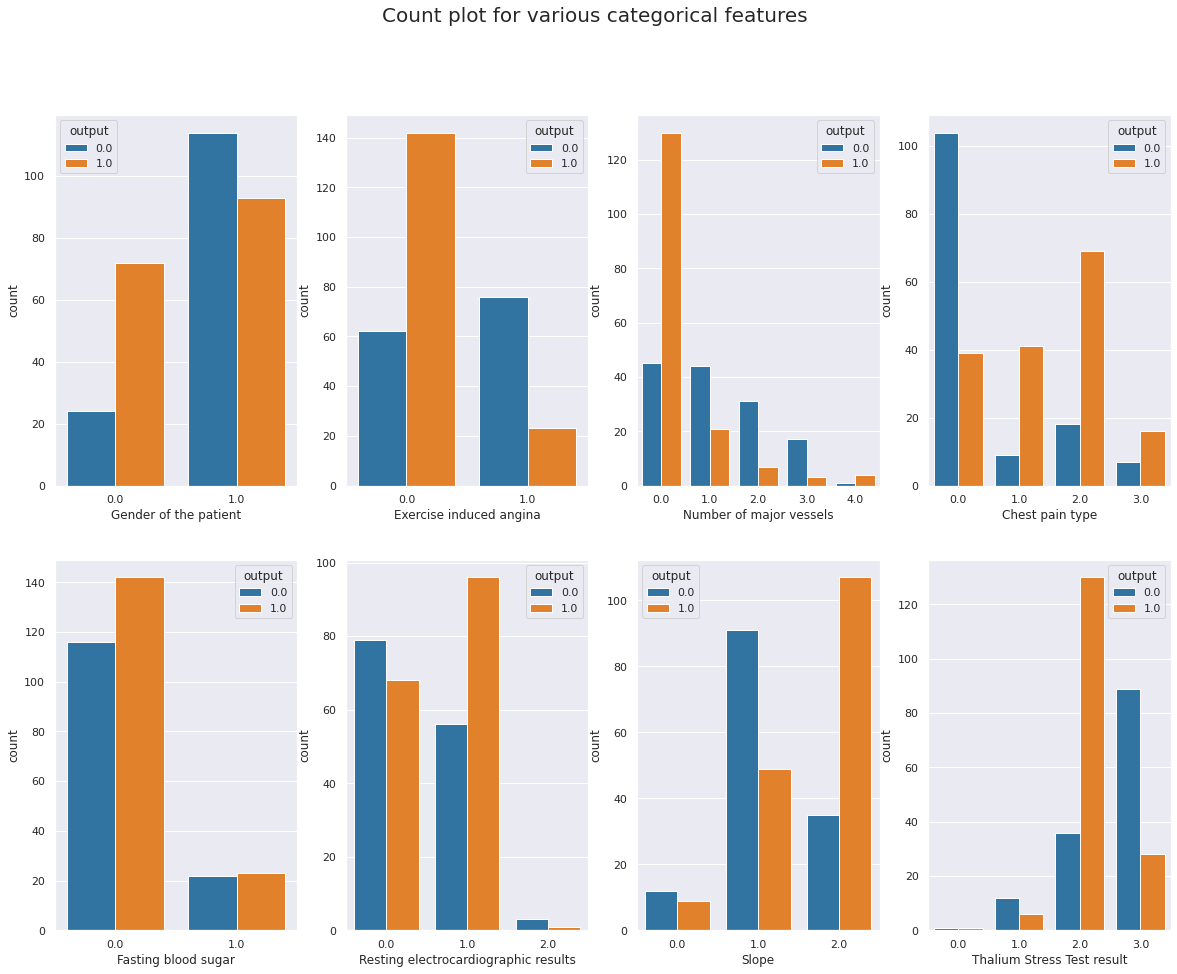

In [33]:
#@title Categorical Feature Analysis
sns.set_context('notebook', font_scale= 1)
fig, ax = plt.subplots(2, 4, figsize = (20, 15))
#ax[3, 3].axis('off')

plt.suptitle('Count plot for various categorical features', fontsize = 20)

ax1 = sns.countplot(x ='sex', data= df, ax= ax[0, 0], hue = 'output' ,palette= 'tab10')
ax1.set(xlabel = 'Gender of the patient')

ax2 = sns.countplot(x ='exng', data= df, hue= 'output', ax= ax[0, 1], palette= 'tab10')
ax2.set(xlabel = 'Exercise induced angina')

ax3 = sns.countplot(x ='caa', data= df, ax= ax[0, 2], hue = 'output', palette= 'tab10')
ax3.set(xlabel = 'Number of major vessels')

ax4 = sns.countplot(x ='cp', data= df, hue = 'output', ax= ax[0, 3], palette= 'tab10')
ax4.set(xlabel = 'Chest pain type')

ax5 = sns.countplot(x ='fbs', data= df, hue = 'output', ax= ax[1, 0], palette= 'tab10')
ax5.set(xlabel = 'Fasting blood sugar')

ax6 = sns.countplot(x ='restecg', data= df, ax= ax[1,1 ], hue = 'output', palette= 'tab10')
ax6.set(xlabel = 'Resting electrocardiographic results')

ax7 = sns.countplot(x ='slp', data= df, ax= ax[1, 2], hue = 'output', palette= 'tab10')
ax7.set(xlabel = 'Slope')

ax8 = sns.countplot(x ='thall', data= df, ax= ax[1, 3], hue = 'output', palette= 'tab10')
ax8.set(xlabel = 'Thalium Stress Test result')


plt.show()

Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left

Male sex experiences more heart attacks than female. It is surprisingly shocking how heart attack can occur more when there is no exercise induced angina, fasting sugar low, resting electrocardiographic results being normal and having more cases of heart attack. According to domain knowledge that should be the opposite. That may be due to having a very small dataset eventhough the output, target, is balanced.

As slop of the heart rate increases the heart attack chances increase.

In general, we found as thalium stress increases the heart attack chances increase.

Chest pain having higher chance of heart attack for less symptomatic cases such as non-angina pain instead of typical angina. That untypical situation may be due to the small dataset we have.

### Female - Male Category Analysis : 

In [34]:
#@title #Participants female male category
colors = ['gold', 'mediumturquoise']
labels = ['Female','Male']
values = df['sex'].value_counts()/df['sex'].shape[0]

fig1 = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig1.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig1.update_layout(
    title_text="All participants sexes",
    title_font_color="black",
    legend_title_font_color="yellow",
    #paper_bgcolor="black",
    #plot_bgcolor='black',
    font_color="black",
)
fig1.show()

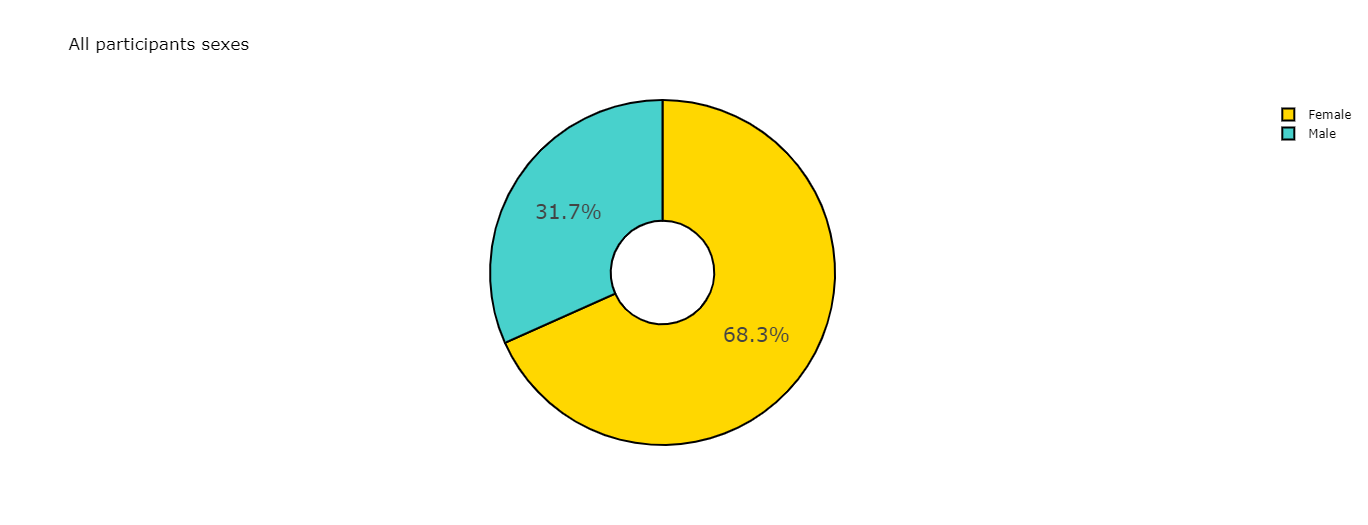

### Age Group Distribution:


In [35]:
def age_cohort(age):
    if age <= 45:
        return "0-45"
    elif age > 45 and age <= 55:
        return "45-55"
    elif age > 55 and age <= 60:
        return "55-60"
    elif age > 60:
        return "60+"
df_age = df.copy()    
df_age['age'] = df_age['age'].apply(age_cohort)
df.sort_values('age', inplace = True)

In [ ]:
colors = ['gold', 'mediumturquoise']
labels = df_age['age'].value_counts().index
values = df_age['age'].value_counts()

fig2 = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig2.update_layout(
    title_text="Age Group Distribution"
)
fig2.show()

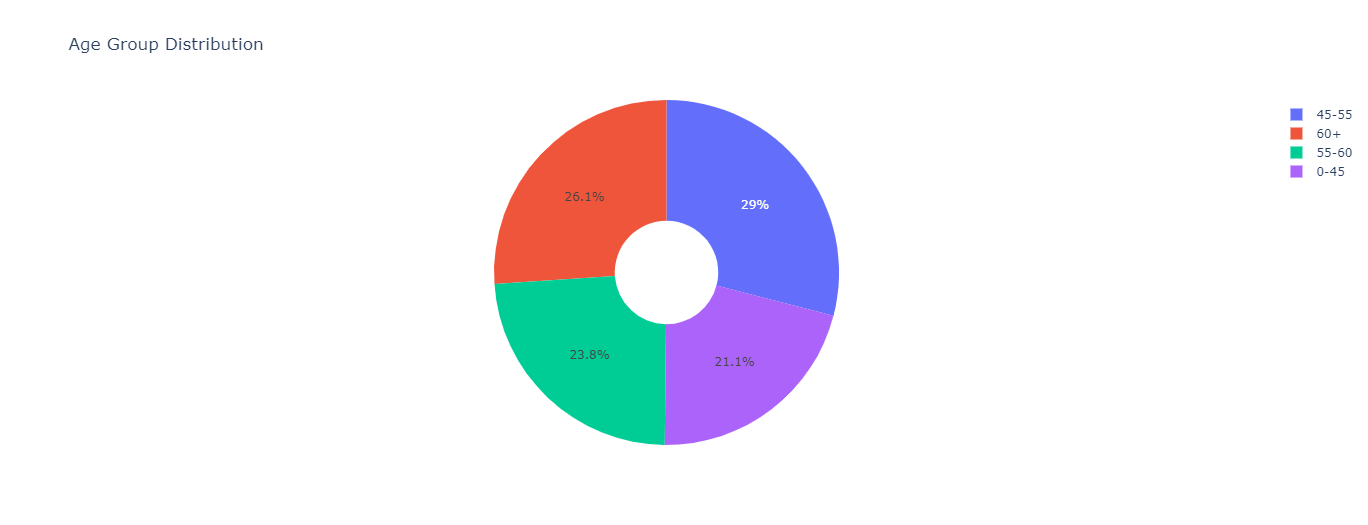

###Number of people between the ages:
###0-45 are 21.1 % 
###45-55 are 29%
###55-60 are 23.8 % 
###60+ are 26.1%

### Number of people in sexes:
###Female 68.3%
### Male 31.7 % 

### Here, we see that age is distributed normally (balanced) whereas sex is slightly unbalanced which might be due to having a small dataset. 

## Correlation Check using Heat Map for all the features

In [36]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,o2Saturation
72,29.0,1.0,1.0,130.0,204.0,0.0,0.0,202.0,0.0,0.0,2.0,0.0,2.0,1.0,97.5
58,34.0,1.0,3.0,118.0,182.0,0.0,0.0,174.0,0.0,0.0,2.0,0.0,2.0,1.0,97.5
125,34.0,0.0,1.0,118.0,210.0,0.0,1.0,192.0,0.0,0.7,2.0,0.0,2.0,1.0,97.5
239,35.0,1.0,0.0,126.0,282.0,0.0,0.0,156.0,1.0,0.0,2.0,0.0,3.0,0.0,97.5
65,35.0,0.0,0.0,138.0,183.0,0.0,1.0,182.0,0.0,1.4,2.0,0.0,2.0,1.0,97.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,71.0,0.0,2.0,110.0,265.0,1.0,0.0,130.0,0.0,0.0,2.0,1.0,2.0,1.0,97.5
151,71.0,0.0,0.0,112.0,149.0,0.0,1.0,125.0,0.0,1.6,1.0,0.0,2.0,1.0,97.5
129,74.0,0.0,1.0,120.0,269.0,0.0,0.0,121.0,1.0,0.2,2.0,1.0,2.0,1.0,97.5
144,76.0,0.0,2.0,140.0,197.0,0.0,2.0,116.0,0.0,1.1,1.0,0.0,2.0,1.0,98.1


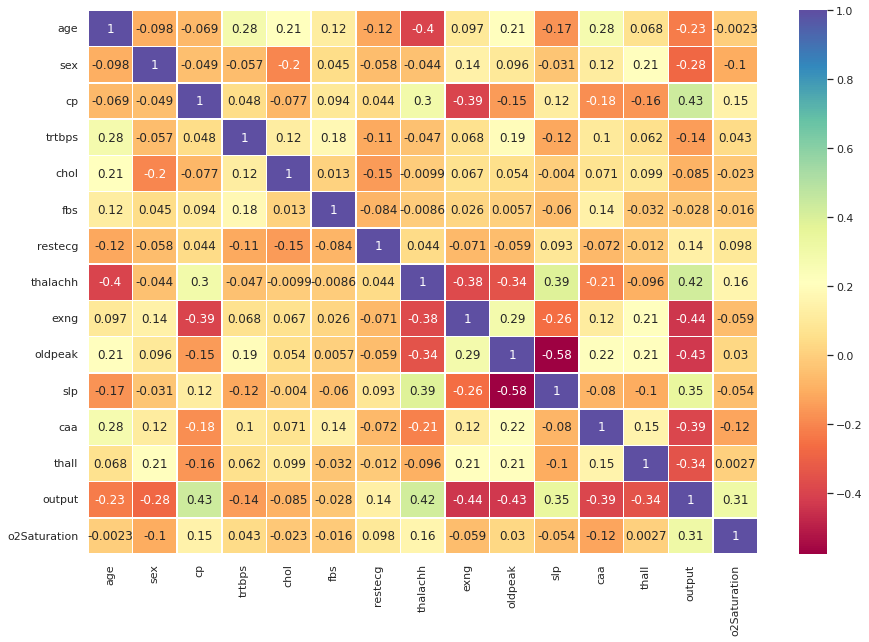

In [37]:
plt.figure(figsize = (15, 10))
sns.heatmap(data = df.corr(), cmap = "Spectral", annot = True, linewidths = 0.5)

Summary :

Heart attack chances are highly correlated with chest pain, maximum heart rate achieved and inversely correlated with previous exng heart signal peak. Hence, they are important variables to consider for test and training data sets.

It is important to have as little correlation as possible among variables with output and in general it agrees in the heat map

We can drop " colesterol" and "fasting blood pressure" columns since the last they do not display a strong correlation as we also showed for the last two how they do not display domain knowledge trends at categorical feature analysis.

As shown in data analysis, it is surprising to see exercise induced angina, exng, at 0 highly correlating with output.

Let's check high correlation of categorical features to go deeper in what category level has significant correlation with heart disease.

Checking the correlations, there is significant number of heart disease cases at 0 vessel. Typically that is what we will see for heart attack cases having 0 vessels. 

As we also visualized at categorical analysis, the 0 vessel has heart attack chance higher. 
Exercise induced angina 0 correlates highly with heart attack.

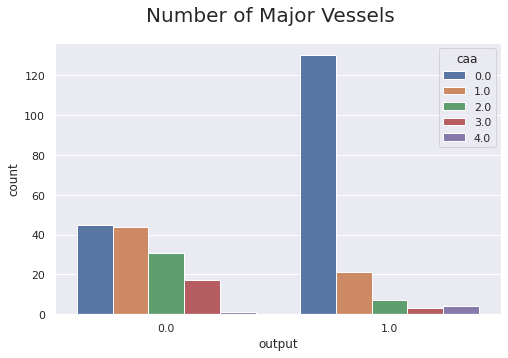

In [ ]:
sns.set(rc={'figure.figsize':(8,5)})
sns.countplot(x ='output', hue = "caa", data = df)
plt.suptitle('Number of Major Vessels', fontsize = 20)
plt.show()

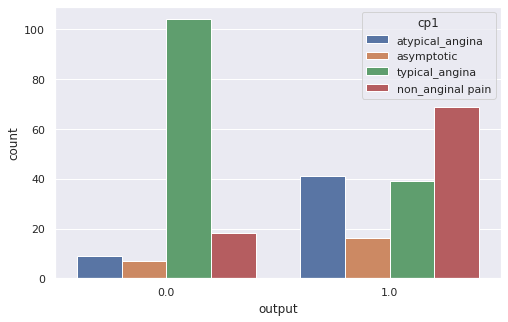

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(8,5)})
 
# count plot on two categorical variable
renamed1_df = df.copy()
renamed1_df['cp1']= renamed1_df['cp'].replace([0, 1, 2, 3], ["typical_angina","atypical_angina","non_anginal pain","asymptotic"])

sns.countplot(x ='output', hue = "cp1", data = renamed1_df)
 
# Show the plot
plt.show()

Description:
#### Analysis Outputs <a id = 34></a>
#### Age 
* the "thalachh" variable has the highest correlation with the "age" variable. There is a negative correlation between them, which we can call moderately.
* The severity of the correlation is -0.40. In other words, there is a  highly inverse relationship between the "age" and "thalachh" variables.
* In summary, we can say that the amount of heart rate reached decreases as age increases because there is an inverse proportion between them.

#### Trtbps 
*  "age" variable has the highest correlation with the "trtbps" variable. The correlation between them is 0.28
*  There is a positive low-intensity correlation.
*  As "age" increases, the resting blood pressure increases.


#### Chol 
*  "Age" has the highest correlation with "Chol" variable. 
*  The correlation is low positive with a magnitude of 0.21.
*  As age increases, cholesterol also increases.


#### Thelachh
*  The "Thalach" variable has the highest correlation with the "output" variable.

*  There is a 0.42 positive and moderate correlation between them. In other words, it is a variable that can directly trigger a heart attack.

*  There is a variable with which this variable has many correlations.

*  These correlations mean that the maximum heart rate reached maybe a situation triggered by other variables.

#### Oldpeak
*  The most significant correlation ratio among all the variables in the plot is -0.58 between the "slope" and "oldpeak" variable.
*  The correlation between them is negative, which is slightly above medium intensity.
*  The "target" variable is the second most significant correlation which is negative low-intensity.

#### Sex

*  No robust correlation exists between other variables and sex. Only a low-intensity negative correlation -0.28 with "output". 
#### Fbs

*  There is no good correlation of fasting blood sugar with other features. The highest correlation is positive low-intensity correlation with "trtbps" . 

*  We can conclude this as fasting blood sugar increases, resting blood pressure also increases.

#### Rest_ecg

*  There is no good correlation of resting electrchardiographic results with other features. The highest correlation is positive low-intensity correlation with "caa" with highest correlation ratio 0.14 and low-intensity correlation ratio -0.15 with "chol".

#### Exng

*  The "output" variable has the highest correlation to the exercise-induced angina variable with -0.44 correlation ratio. 
*  Additionally, it correlates with other features in addition to "output".

#### Slp

*  "Slp" has highest correlation with "oldpeak" with -0.58 correlation ratio which higher than a moderate correlation and is significant. 

*  There are moderate correlations of slope with "output" and "thalachh". 

*  The lower the heart rate peak, higher the slope. 


#### caa

*  The "Caa" variable has the highest correlation with the output variable as -0.39.
*  Then comes the "age" variable with 0.28. We can say that there is a low positive correlation with the age variable. 

#### thall

*  Thallium stress test results have highest correlation with output at -0.34. There are few more low correlations.  

#### output

*  Output correlates with more than one variable however relationships are below the middle level around 0.4 . 

## DATA PROCESESSING AND DATA PREPARATION

### Let's drop the columns that are low in correlation with the output (our target as heart disease or none). 


In [38]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,o2Saturation
72,29.0,1.0,1.0,130.0,204.0,0.0,0.0,202.0,0.0,0.0,2.0,0.0,2.0,1.0,97.5
58,34.0,1.0,3.0,118.0,182.0,0.0,0.0,174.0,0.0,0.0,2.0,0.0,2.0,1.0,97.5
125,34.0,0.0,1.0,118.0,210.0,0.0,1.0,192.0,0.0,0.7,2.0,0.0,2.0,1.0,97.5
239,35.0,1.0,0.0,126.0,282.0,0.0,0.0,156.0,1.0,0.0,2.0,0.0,3.0,0.0,97.5
65,35.0,0.0,0.0,138.0,183.0,0.0,1.0,182.0,0.0,1.4,2.0,0.0,2.0,1.0,97.5


In [39]:
df.drop(["chol", "fbs"], axis = 1, inplace = True)

## Checking outliers


### Now cholestoral box plot from previous continuous feature data analysis is eliminated. Let's check for other continuous features if they have outliers. Let's check them again and eliminate them.
### Here the data is concentrated to the right for maximum heart rate achieved. It is to the left for previous peak. The outliers are the small circles here.

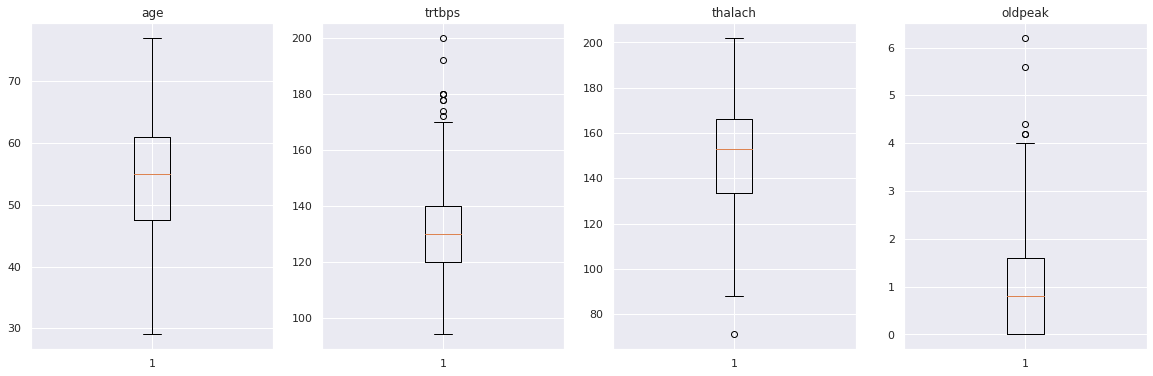

In [40]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (20, 6))

ax1.boxplot(df["age"])
ax1.set_title("age")

ax2.boxplot(df["trtbps"])
ax2.set_title("trtbps")

ax3.boxplot(df["thalachh"])
ax3.set_title("thalach")

ax4.boxplot(df["oldpeak"])
ax4.set_title("oldpeak")

plt.show()

### Identify the each outliers for resting blood pressure 

### I picked three treshholds using z scores to see outliers for each.

In [41]:
z_scores_trtbps = zscore(df["trtbps"])
for threshold in range(1, 4):
    print("Threshold Value: {}".format(threshold))
    print("Number of Outliers: {}".format(len(np.where(z_scores_trtbps > threshold)[0])))
    print("-------------------")

Threshold Value: 1
Number of Outliers: 51
-------------------
Threshold Value: 2
Number of Outliers: 13
-------------------
Threshold Value: 3
Number of Outliers: 2
-------------------


### Detecting the outliers:

In [42]:
df[z_scores_trtbps > 2][["trtbps"]]

,trtbps
8,172.0
248,192.0
266,180.0
223,200.0
292,170.0
241,174.0
101,178.0
228,170.0
195,170.0
152,170.0


### Let's limit the outliers by limiting min max values by applying winsorize method that replaces the min and max data points by the observations closest to them. 

In [43]:
df[z_scores_trtbps > 2].trtbps.min()

170.0

In [44]:
df[df["trtbps"] < 170].trtbps.max()

165.0

### Using the winsorize method, we are limiting the extreme values in statistical data to reduce the effects of possibly spurious outliers. 

In [45]:
winsorize_percentile_trtbps = (stats.percentileofscore(df["trtbps"], 165)) / 100
print(winsorize_percentile_trtbps)

0.957095709570957


In [46]:
1 - winsorize_percentile_trtbps

0.04290429042904298

In [47]:
trtbps_winsorize = winsorize(df.trtbps, (0, (1 - winsorize_percentile_trtbps)))

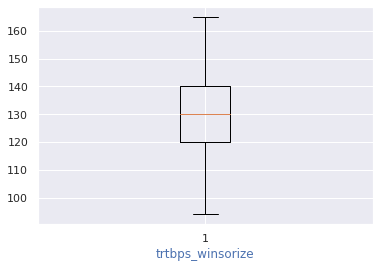

In [48]:
plt.boxplot(trtbps_winsorize)
plt.xlabel("trtbps_winsorize", color = "b")
plt.show()

In [49]:
df["trtbps_winsorize"] = trtbps_winsorize

In [50]:
df.head()

,age,sex,cp,trtbps,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,o2Saturation,trtbps_winsorize
72,29.0,1.0,1.0,130.0,0.0,202.0,0.0,0.0,2.0,0.0,2.0,1.0,97.5,130.0
58,34.0,1.0,3.0,118.0,0.0,174.0,0.0,0.0,2.0,0.0,2.0,1.0,97.5,118.0
125,34.0,0.0,1.0,118.0,1.0,192.0,0.0,0.7,2.0,0.0,2.0,1.0,97.5,118.0
239,35.0,1.0,0.0,126.0,0.0,156.0,1.0,0.0,2.0,0.0,3.0,0.0,97.5,126.0
65,35.0,0.0,0.0,138.0,1.0,182.0,0.0,1.4,2.0,0.0,2.0,1.0,97.5,138.0


# Identify and eliminate Thalach feature outliers

Let's code to find the outliers by limiting the values between 0.25 and 0.75 quantile

In [51]:
def iqr(df, var):
    q1 = np.quantile(df[var], 0.25)
    q3 = np.quantile(df[var], 0.75)
    diff = q3 - q1
    lower_v = q1 - (1.5 * diff)
    upper_v = q3 + (1.5 * diff)
    return df[(df[var] < lower_v) | (df[var] > upper_v)]

In [52]:
thalachh_out = iqr(df, "thalachh")


## Only one outlier detected

In [53]:
thalachh_out


,age,sex,cp,trtbps,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,o2Saturation,trtbps_winsorize
272,67.0,1.0,0.0,120.0,1.0,71.0,0.0,1.0,1.0,0.0,2.0,0.0,97.0,120.0


In [54]:
df.drop([272], axis = 0, inplace = True)

In [55]:
df["thalachh"][270:275]

150    138.0
51     151.0
247    120.0
153    152.0
265    132.0
Name: thalachh, dtype: float64

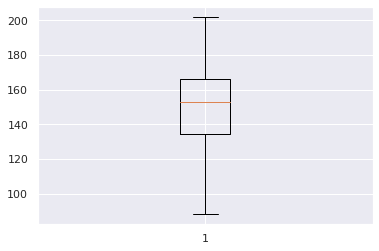

In [56]:
plt.boxplot(df["thalachh"]);

# Identify and eliminate outliers of Oldpeak variable

In [57]:
def iqr(df, var):
    q1 = np.quantile(df[var], 0.25)
    q3 = np.quantile(df[var], 0.75)
    diff = q3 - q1
    lower_v = q1 - (1.5 * diff)
    upper_v = q3 + (1.5 * diff)
    return df[(df[var] < lower_v) | (df[var] > upper_v)]

### these are the outliers

In [58]:
iqr(df, "oldpeak")

,age,sex,cp,trtbps,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,o2Saturation,trtbps_winsorize
250,51.0,1.0,0.0,140.0,1.0,122.0,1.0,4.2,1.0,3.0,3.0,0.0,97.5,140.0
221,55.0,1.0,0.0,140.0,1.0,111.0,1.0,5.6,0.0,0.0,3.0,0.0,97.5,140.0
291,58.0,1.0,0.0,114.0,2.0,140.0,0.0,4.4,0.0,3.0,1.0,0.0,97.5,114.0
101,59.0,1.0,3.0,178.0,0.0,145.0,0.0,4.2,0.0,0.0,3.0,1.0,97.5,165.0
204,62.0,0.0,0.0,160.0,0.0,145.0,0.0,6.2,0.0,3.0,3.0,0.0,97.5,160.0


In [59]:
df[df["oldpeak"] < 4.2].oldpeak.max()

4.0

### Let's see the rest of the data is what percentage of the whole data points

In [60]:
winsorize_percentile_oldpeak = (stats.percentileofscore(df["oldpeak"], 4)) / 100
print(winsorize_percentile_oldpeak)

0.9801324503311258


### It is quite high which means we can eliminate the outliers without any worry for what dataset left for modeling. 

In [61]:
oldpeak_winsorize = winsorize(df.oldpeak, (0, (1 - winsorize_percentile_oldpeak)))

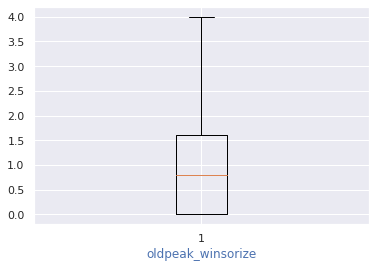

In [62]:
plt.boxplot(oldpeak_winsorize)
plt.xlabel("oldpeak_winsorize", color = "b")
plt.show()

In [63]:
df["oldpeak_winsorize"] = oldpeak_winsorize

In [64]:
df.head()

,age,sex,cp,trtbps,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,o2Saturation,trtbps_winsorize,oldpeak_winsorize
72,29.0,1.0,1.0,130.0,0.0,202.0,0.0,0.0,2.0,0.0,2.0,1.0,97.5,130.0,0.0
58,34.0,1.0,3.0,118.0,0.0,174.0,0.0,0.0,2.0,0.0,2.0,1.0,97.5,118.0,0.0
125,34.0,0.0,1.0,118.0,1.0,192.0,0.0,0.7,2.0,0.0,2.0,1.0,97.5,118.0,0.7
239,35.0,1.0,0.0,126.0,0.0,156.0,1.0,0.0,2.0,0.0,3.0,0.0,97.5,126.0,0.0
65,35.0,0.0,0.0,138.0,1.0,182.0,0.0,1.4,2.0,0.0,2.0,1.0,97.5,138.0,1.4


### Finally, let's drop the columns that less correlate

In [65]:
df.drop(["trtbps", "oldpeak"], axis = 1, inplace = True)

### Final dataset after outliers are manipulated and eliminated

In [66]:
df.head()

,age,sex,cp,restecg,thalachh,exng,slp,caa,thall,output,o2Saturation,trtbps_winsorize,oldpeak_winsorize
72,29.0,1.0,1.0,0.0,202.0,0.0,2.0,0.0,2.0,1.0,97.5,130.0,0.0
58,34.0,1.0,3.0,0.0,174.0,0.0,2.0,0.0,2.0,1.0,97.5,118.0,0.0
125,34.0,0.0,1.0,1.0,192.0,0.0,2.0,0.0,2.0,1.0,97.5,118.0,0.7
239,35.0,1.0,0.0,0.0,156.0,1.0,2.0,0.0,3.0,0.0,97.5,126.0,0.0
65,35.0,0.0,0.0,1.0,182.0,0.0,2.0,0.0,2.0,1.0,97.5,138.0,1.4


# Applying One hot encoding method to categorical variables

### Let's charactarize each categorical variable component with a numerical encoding. This allow us to use model predictions more proficiently. 

In [67]:
numeric_var = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
categoric_var = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']

In [68]:
categoric_var

['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']

In [69]:
categoric_var.remove("fbs")

In [70]:
categoric_var

['sex', 'cp', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']

In [71]:
df = pd.get_dummies(df, columns = categoric_var[:-1], drop_first = True)

In [72]:
df.head()

,age,thalachh,output,o2Saturation,trtbps_winsorize,oldpeak_winsorize,sex_1.0,cp_1.0,cp_2.0,cp_3.0,...,exng_1.0,slp_1.0,slp_2.0,caa_1.0,caa_2.0,caa_3.0,caa_4.0,thall_1.0,thall_2.0,thall_3.0
72,29.0,202.0,1.0,97.5,130.0,0.0,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
58,34.0,174.0,1.0,97.5,118.0,0.0,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0
125,34.0,192.0,1.0,97.5,118.0,0.7,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
239,35.0,156.0,0.0,97.5,126.0,0.0,1,0,0,0,...,1,0,1,0,0,0,0,0,0,1
65,35.0,182.0,1.0,97.5,138.0,1.4,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


### Feature scaling with the RobustScaler method of continuous and numerical variables for ML models use

In [73]:
final_dataset = df.copy()

In [74]:
new_numeric_var = ["age", "thalachh", "trtbps_winsorize", "oldpeak_winsorize"]

In [75]:
robust_scaler = RobustScaler()

In [76]:
final_dataset[new_numeric_var] = robust_scaler.fit_transform(df[new_numeric_var])

### Final dataset/ dataframe before modeling

We have 22 columns in the dataset where we removed 3 continuous features and added the each elements of categorical features as columns at one hot encoding. 

In [ ]:
df.shape

(302, 22)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 72 to 238
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                302 non-null    float64
 1   thalachh           302 non-null    float64
 2   output             302 non-null    float64
 3   o2Saturation       302 non-null    float64
 4   trtbps_winsorize   302 non-null    float64
 5   oldpeak_winsorize  302 non-null    float64
 6   sex_1.0            302 non-null    uint8  
 7   cp_1.0             302 non-null    uint8  
 8   cp_2.0             302 non-null    uint8  
 9   cp_3.0             302 non-null    uint8  
 10  restecg_1.0        302 non-null    uint8  
 11  restecg_2.0        302 non-null    uint8  
 12  exng_1.0           302 non-null    uint8  
 13  slp_1.0            302 non-null    uint8  
 14  slp_2.0            302 non-null    uint8  
 15  caa_1.0            302 non-null    uint8  
 16  caa_2.0            302 no

In [77]:
final_dataset.describe()

,age,thalachh,output,o2Saturation,trtbps_winsorize,oldpeak_winsorize,sex_1.0,cp_1.0,cp_2.0,cp_3.0,...,exng_1.0,slp_1.0,slp_2.0,caa_1.0,caa_2.0,caa_3.0,caa_4.0,thall_1.0,thall_2.0,thall_3.0
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,...,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,-0.049127,-0.098181,0.546358,97.486093,0.055132,0.140315,0.682119,0.165563,0.288079,0.076159,...,0.327815,0.460265,0.470199,0.215232,0.125828,0.066225,0.016556,0.059603,0.546358,0.387417
std,0.659483,0.713948,0.498673,0.352125,0.805895,0.694980,0.466426,0.372305,0.453620,0.265693,...,0.470196,0.499246,0.499939,0.411665,0.332206,0.249088,0.127813,0.237142,0.498673,0.487969
min,-1.890909,-2.063492,0.000000,96.500000,-1.800000,-0.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.563636,-0.587302,0.000000,97.500000,-0.500000,-0.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,97.500000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.436364,0.412698,1.000000,97.500000,0.500000,0.500000,1.000000,0.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.600000,1.555556,1.000000,98.600000,1.750000,2.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Seperating data into test and training set

In [78]:

X = df.drop(["output"], axis = 1)
y = df[["output"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 3)

In [79]:
X_train.head()

,age,thalachh,o2Saturation,trtbps_winsorize,oldpeak_winsorize,sex_1.0,cp_1.0,cp_2.0,cp_3.0,restecg_1.0,...,exng_1.0,slp_1.0,slp_2.0,caa_1.0,caa_2.0,caa_3.0,caa_4.0,thall_1.0,thall_2.0,thall_3.0
101,59.0,145.0,97.5,165.0,4.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
41,48.0,180.0,97.5,130.0,0.2,1,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
64,58.0,165.0,97.5,140.0,0.0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
110,64.0,154.0,97.5,165.0,0.0,0,0,0,0,1,...,1,0,1,0,0,0,0,0,1,0
227,35.0,130.0,97.5,120.0,1.6,1,0,0,0,1,...,1,1,0,0,0,0,0,0,0,1


In [80]:
y_train.head()

,output
101,1.0
41,1.0
64,1.0
110,1.0
227,0.0


In [81]:
print(f"X_train: {X_train.shape[0]}")
print(f"X_test: {X_test.shape[0]}")
print(f"y_train: {y_train.shape[0]}")
print(f"y_test: {y_test.shape[0]}")

X_train: 271
X_test: 31
y_train: 271
y_test: 31


There are 31 test data points and 271 training data points.

# Data Modeling

This is a classification problem in machine learning to classify patients as having heart attack risk or non (normal health). 

We are not considering any neural network algorithms here since it performs well in large datasets hence it is not necessary for our small dataset. 

We will try binary classification algorithms starting with logistic regression, decision trees, support vector machines, decision trees, random forests, K-nearest neighborhood, bernoulli naive bayes and ensemble algorithms such as XGBoost, AdaBoost, Extra Trees Classifier, Gradient Booster Classifier, CatBoost Classifier. 

## Logistic Regression Algorithm 

In [ ]:

log_reg = LogisticRegression()
log_reg


LogisticRegression()

In [ ]:
log_reg.fit(X_train, y_train)

In [ ]:
y_pred = log_reg.predict(X_test)

In [ ]:
y_pred

array([1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0.])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: {}".format(accuracy))

Test Accuracy: 0.8064516129032258


We can use cross validation to check training sets of all the dataset portion by portion and find the average of all.

We are using 10 folds generation of test set. 

In [ ]:
scores = cross_val_score(log_reg, X_train, y_train, cv=10)


In [ ]:
scores

array([0.89285714, 0.85714286, 0.88888889, 0.88888889, 0.85185185,
       0.85185185, 0.96296296, 0.74074074, 0.77777778, 0.7037037 ])

In [ ]:

print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.8416666666666666


## ROC Curve and Area Under ROC Curve

The area of field under the curve given tells us how likely the logistic regression could evaluate true results. As it is closer to the y axis therefore has bigger area under the plot, we can conclude there are significantly correct prediction results. 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



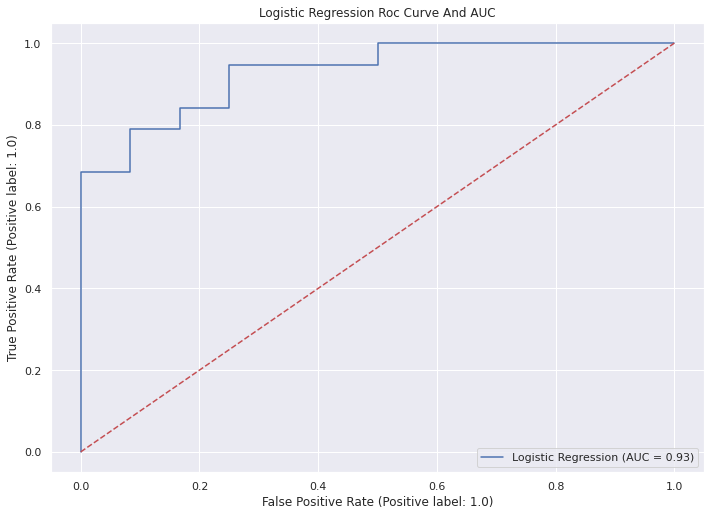

In [ ]:
plot_roc_curve(log_reg, X_test, y_test, name = "Logistic Regression")
plt.title("Logistic Regression Roc Curve And AUC")
plt.plot([0, 1], [0, 1], "r--")
plt.show()

###  Here we get 0.93 AUC value which is close to be excellent if we categorize them as 0.8-0.9 good and 0.9-1 as excellent. 

## Hyperparameter optimization with GridSearchCV.

Hyperparameters are important because they directly control the behaviour of the training algorithm and have a significant impact on the performance of the model is being trained.

 It tries all different combinations to identify the best performing hyper parameters of the ML model. It is a simple algorithm to use hence it works well with small data sets like ours rather than large. 

In [ ]:
log_reg_new = LogisticRegression()
log_reg_new

LogisticRegression()

In [ ]:
parameters = {"penalty":["l1","l2"], "solver" : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [ ]:
log_reg_grid = GridSearchCV(log_reg_new, param_grid = parameters)

In [ ]:
log_reg_grid.fit(X_train, y_train)

In [ ]:
print("Best Parameters: ", log_reg_grid.best_params_)

Best Parameters:  {'penalty': 'l2', 'solver': 'newton-cg'}


In [ ]:
log_reg_new2 = LogisticRegression(penalty = "l1", solver = "saga")
log_reg_new2

LogisticRegression(penalty='l1', solver='saga')

In [ ]:
log_reg_new2.fit(X_train, y_train)

In [ ]:
y_pred = log_reg_new2.predict(X_test)

In [ ]:
print("The test accuracy score of Logistic Regression After hyper-parameter tuning is: {}".format(accuracy_score(y_test, y_pred)))

The test accuracy score of Logistic Regression After hyper-parameter tuning is: 0.7419354838709677


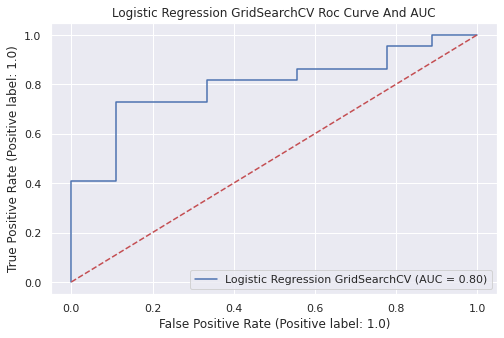

In [ ]:
plot_roc_curve(log_reg_new2, X_test, y_test, name = "Logistic Regression GridSearchCV")
plt.title("Logistic Regression GridSearchCV Roc Curve And AUC")
plt.plot([0, 1], [0, 1], "r--")
plt.show()

In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.54      0.78      0.64         9
         1.0       0.89      0.73      0.80        22

    accuracy                           0.74        31
   macro avg       0.71      0.75      0.72        31
weighted avg       0.79      0.74      0.75        31



# Decision Tree Algorithm 

In [ ]:
dec_tree = DecisionTreeClassifier(random_state = 5)


In [ ]:
dec_tree.fit(X_train, y_train)


DecisionTreeClassifier(random_state=5)

In [ ]:
y_pred = dec_tree.predict(X_test)


In [ ]:
log_reg_grid.fit(X_train, y_train)

In [ ]:
print("Best Parameters: ", log_reg_grid.best_params_)

Best Parameters:  {'penalty': 'l2', 'solver': 'newton-cg'}


In [ ]:
log_reg_new2 = LogisticRegression(penalty = "l1", solver = "saga")
log_reg_new2

LogisticRegression(penalty='l1', solver='saga')

In [ ]:
log_reg_new2.fit(X_train, y_train)

In [ ]:
y_pred = log_reg_new2.predict(X_test)

In [ ]:
print("The test accuracy score of Decision Tree is:", accuracy_score(y_test, y_pred))


The test accuracy score of Decision Tree is: 0.7741935483870968


In [ ]:
scores = cross_val_score(dec_tree, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.7083333333333333


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning:

The least populated class in y has only 9 members, which is less than n_splits=10.



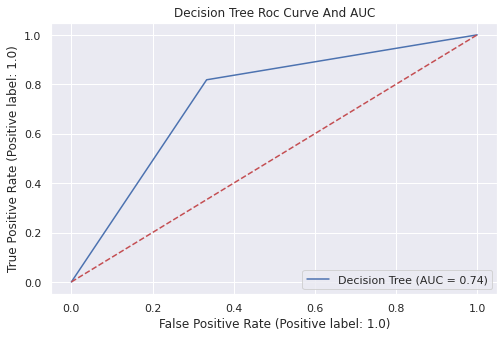

In [ ]:
plot_roc_curve(dec_tree, X_test, y_test, name = "Decision Tree")
plt.title("Decision Tree Roc Curve And AUC")
plt.plot([0, 1], [0, 1], "r--")
plt.show()

In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.60      0.67      0.63         9
         1.0       0.86      0.82      0.84        22

    accuracy                           0.77        31
   macro avg       0.73      0.74      0.73        31
weighted avg       0.78      0.77      0.78        31



# Support Vector Machine Algorithm 

In [ ]:
svc_model = SVC(random_state = 5)

In [ ]:
svc_model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVC(random_state=5)

In [ ]:
y_pred = svc_model.predict(X_test)

In [ ]:
print("The test accuracy score of SVM is:", accuracy_score(y_test, y_pred))

The test accuracy score of SVM is: 0.7419354838709677


In [ ]:
scores = cross_val_score(svc_model, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

It is 0.708

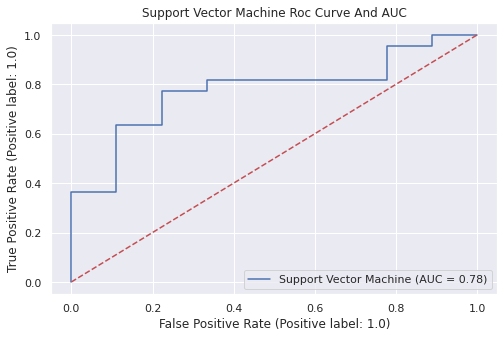

In [ ]:
plot_roc_curve(svc_model, X_test, y_test, name = "Support Vector Machine")
plt.title("Support Vector Machine Roc Curve And AUC")
plt.plot([0, 1], [0, 1], "r--")
plt.show()

In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.55      0.67      0.60         9
         1.0       0.85      0.77      0.81        22

    accuracy                           0.74        31
   macro avg       0.70      0.72      0.70        31
weighted avg       0.76      0.74      0.75        31



# Random Forest Algorithm

In [ ]:
random_forest = RandomForestClassifier(random_state = 5)

In [ ]:
random_forest.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier(random_state=5)

In [ ]:
y_pred = random_forest.predict(X_test)

In [ ]:
print("The test accuracy score of Random Forest is", accuracy_score(y_test, y_pred))

The test accuracy score of Random Forest is 0.8064516129032258


In [ ]:
scores = cross_val_score(random_forest, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

It is 0.8

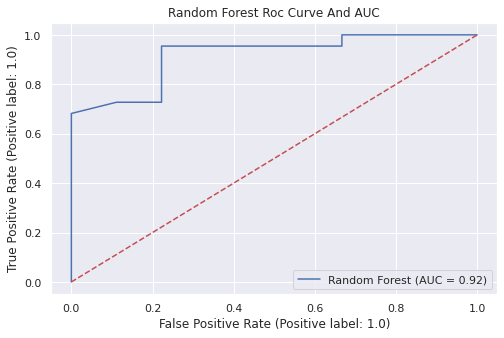

In [ ]:
plot_roc_curve(random_forest, X_test, y_test, name = "Random Forest")
plt.title("Random Forest Roc Curve And AUC")
plt.plot([0, 1], [0, 1], "r--")
plt.show()

In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.64      0.78      0.70         9
         1.0       0.90      0.82      0.86        22

    accuracy                           0.81        31
   macro avg       0.77      0.80      0.78        31
weighted avg       0.82      0.81      0.81        31



# K Nearest Neighborhood 

In [ ]:
knn2 = KNeighborsClassifier(n_neighbors = 2)
knn1 = KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn2.fit(X_train,y_train)
knn1.fit(X_train, y_train)

y_pred_2 = knn2.predict(X_test)
y_pred_1 = knn1.predict(X_test)


In [ ]:

print("Accuracy with k=2", accuracy_score(y_test, y_pred_2)*100)
print("Accuracy with k=1", accuracy_score(y_test, y_pred_1)*100)

Accuracy with k=2 41.935483870967744
Accuracy with k=1 45.16129032258064


In [ ]:
print(metrics.classification_report(y_test, y_pred_1))

              precision    recall  f1-score   support

         0.0       0.21      0.33      0.26         9
         1.0       0.65      0.50      0.56        22

    accuracy                           0.45        31
   macro avg       0.43      0.42      0.41        31
weighted avg       0.52      0.45      0.48        31



# Bernoulli Naive Bayes Classifier

In [82]:
BNBclf = BernoulliNB()
BNBclf.fit(X_train, y_train)
y_pred = BNBclf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [83]:
print("Bernoulli Naive Bayes", accuracy_score(y_test, y_pred)*100)

Bernoulli Naive Bayes 83.87096774193549


In [84]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.64      1.00      0.78         9
         1.0       1.00      0.77      0.87        22

    accuracy                           0.84        31
   macro avg       0.82      0.89      0.83        31
weighted avg       0.90      0.84      0.85        31



# XGBoost Ensemble Algorithm

In [ ]:
model_xgb = XGBClassifier(learning_rate=0.1, max_depth=2, n_estimators=25)

#Training the model
model_xgb.fit(X_train, y_train)

#Prediction
y_xgb = model_xgb.predict(X_test)

#Accuracy
print("The test accuracy score of XGBoost is", accuracy_score(y_test, y_xgb))

The test accuracy score of XGBoost is 0.8387096774193549


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
print(metrics.classification_report(y_test, y_xgb))

              precision    recall  f1-score   support

         0.0       0.67      0.89      0.76         9
         1.0       0.95      0.82      0.88        22

    accuracy                           0.84        31
   macro avg       0.81      0.85      0.82        31
weighted avg       0.87      0.84      0.84        31



# AdaBoost Classifier

In [ ]:
adaboost = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0)

In [ ]:
model1 = adaboost.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
y_pred = model1.predict(X_test)

In [ ]:
print("AdaBoost Classifier Model Accuracy:", accuracy_score(y_test, y_pred))

AdaBoost Classifier Model Accuracy: 0.8064516129032258


In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.64      0.78      0.70         9
         1.0       0.90      0.82      0.86        22

    accuracy                           0.81        31
   macro avg       0.77      0.80      0.78        31
weighted avg       0.82      0.81      0.81        31



#Extra Trees Classifier

In [ ]:
clf = ExtraTreesClassifier(n_estimators=100)
print(clf)

ExtraTreesClassifier()


In [ ]:
etc= clf.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [ ]:
y_pred1 = etc.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred1)

0.7741935483870968

In [ ]:
print(metrics.classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

         0.0       0.58      0.78      0.67         9
         1.0       0.89      0.77      0.83        22

    accuracy                           0.77        31
   macro avg       0.74      0.78      0.75        31
weighted avg       0.80      0.77      0.78        31



# Gradient Boosting Classifier

In [ ]:
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)

In [ ]:
gb= gradient_booster.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
y_predgb = gb.predict(X_test)

In [ ]:
accuracy_score(y_test, y_predgb)

0.8064516129032258

In [ ]:
print(metrics.classification_report(y_test, y_predgb))

              precision    recall  f1-score   support

         0.0       0.67      0.67      0.67         9
         1.0       0.86      0.86      0.86        22

    accuracy                           0.81        31
   macro avg       0.77      0.77      0.77        31
weighted avg       0.81      0.81      0.81        31



#PERFORMANCE ANALYSIS

K-NEAREST NEIGHBORHOOD BEST RESULT 0.94 ACCURACY

In [ ]:
print(metrics.classification_report(y_test, y_pred_1))

              precision    recall  f1-score   support

         0.0       0.21      0.33      0.26         9
         1.0       0.65      0.50      0.56        22

    accuracy                           0.45        31
   macro avg       0.43      0.42      0.41        31
weighted avg       0.52      0.45      0.48        31



Decision Tree Algorithm

In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.64      0.78      0.70         9
         1.0       0.90      0.82      0.86        22

    accuracy                           0.81        31
   macro avg       0.77      0.80      0.78        31
weighted avg       0.82      0.81      0.81        31



##   Conclusion: Bernoulli Naive Bayes and XGBoost Ensemble have the highest accuracy scores. Recall is higher at Bernoulli Naive Bayes for output 1 and output 0 predictions since it predicts more relevant values among retrieved data. 

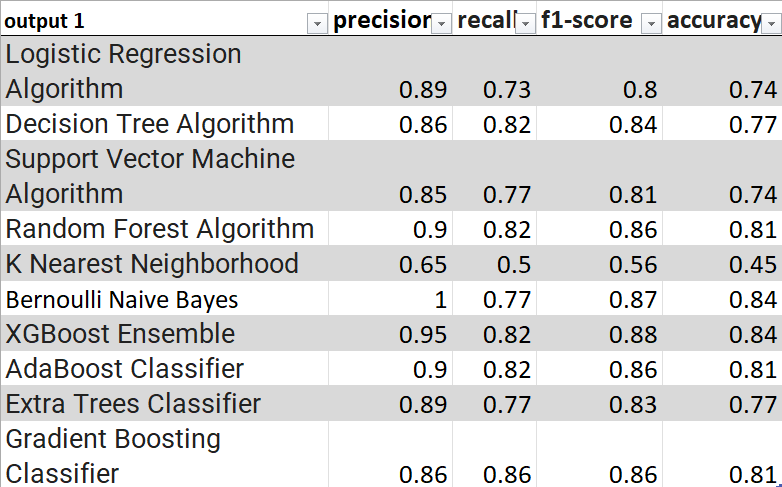

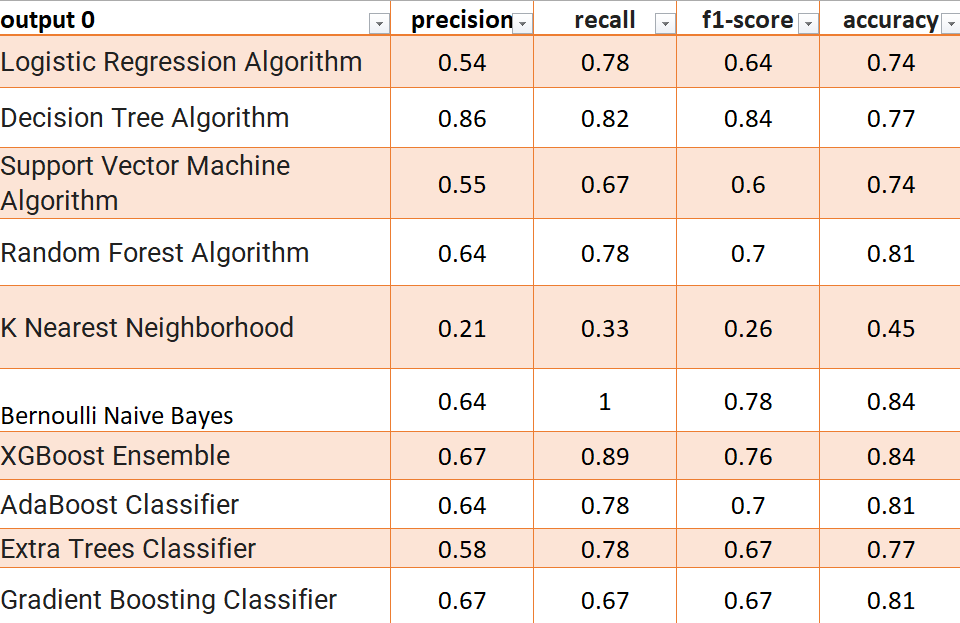

In [85]:
model= BNBclf.fit(X_train, y_train)
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))
print(model)
model.get_params()

BernoulliNB()


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



{'alpha': 1.0, 'binarize': 0.0, 'class_prior': None, 'fit_prior': True}

# Questions

Please describe how you would put your model into production, including how
you would test and monitor the performance of your model.

1. Things to consider when dealing with Real Data in Production:
2. The data set needs to be large enough to train the model and decision of which model to use in production will change after retraining on a larger dataset

3. We will decide on retraining frequency of model in production based on monitoring performance (maybe retraining monthly on new dataset or more frequently depending on monitoring results )

4. We will add some more modules such as datadog to monitor the performance. Some help will be needed from software engineering team to write code to fetch data from database or cloud EC2, S3 bucket, and deliver the results to the end points.

Say you were given 10 minutes of continuous ECG data for each of the patients
in the dataset - How would that change your approach?

1.  Null values will be addressed by different techniques such as imputation if only few feature values are missing in real dataset. Here, in the example, all features and output were missing. So we entirely dropped them

2. Since the production code needs to be giving fast performance in real time to monitor chances of heart attack, we would also need to enhance the computing power (using more cores) so that training is faster.

3. Unless I have the opportunity to retrain models and compare performances for a larger dataset, I will use the same model. 



